# Convolutional Neural Network (CNN)
Convolutional Neural Networks are similar to ordinary neural networks, except that they explicitly assume that the inputs are images, which allows us to encode certain properties into the architecture. Neurons are arranged in 3 dimensions i.e., in width, height and depth.
## Exercise 1: The CIFAR-10 dataset
The **CIFAR-10** dataset (*Canadian Institute for Advanced Research*) is a standard computer vision and deep learning image dataset. It consists of 60 000 color photos of 32x32 pixel squared with RGB for each pixel, divided into 10 classes, that include common objects such as airplanes, automobiles, birds, cats, deer, dog, frog, horse, ship, and truck. Essentially each image is of shape 32x32x3 (height x width x RGB color channels).

CNN consists of the following layer types:
* **Input layer** - holds the raw pixel, so an image of CIFAR-10 will have 32x32x3 dimensions at input layer.
* **Convolution layer** - computes a dot product between the weights of small local region from input layer, so if we decide to have 5 filters the resulted reduced dimension will be 32x32x5. RELU layer applies an element wise activation function which will not affect the dimension.
* **Pooling layer** - it will down sample the spatial dimension along width and height, resulting in dimension 16x16x5.
* **Dropout layer** - it randomly sets input units to 0 with a frequency of **rate** at each step during training time, which helps prevent overfitting.
* **Flatten layer** - reshapes the tensor to have the shape that is equal to the number of elements contained in tensor.
* **Fully-connected layer** - computes the class score, and the resulted dimension will be a single vector 1x1x10 (10 class scores). Each neuron in this layer is connected to all neurons in the previous layer.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.preprocessing import sequence
from IPython.display import SVG, display
from keras.utils import model_to_dot, plot_model

In [2]:
img_rows, img_cols = 32, 32
img_channels = 3
batch_size = 256
nb_classes = 10
nb_epoch = 5
nb_filters = 10    # The number of filters
nb_conv = 3        # Window or kernel size of filter
nb_pool = 2        # Window size of pooling
kernel_size = 3    # Convolution kernel size
input_shape = (img_rows, img_cols, 3) # Input_shape for Tensorflow

# Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# Define 2 groups of layers: feature (convolutions) and classification (dense)
feature_layers = [Conv2D(nb_filters, kernel_size, input_shape = input_shape),
                  Activation('relu'),
                  Conv2D(nb_filters, kernel_size),
                  Activation('relu'),
                  MaxPooling2D(pool_size = (nb_pool, nb_pool)),
                  Dropout(0.25),
                  Flatten()]

classification_layers = [Dense(512),
                         Activation('relu'),
                         Dropout(0.5),
                         Dense(nb_classes),
                         Activation('softmax')]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Create and compile model
model = Sequential(feature_layers + classification_layers)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

##Model layers visualization

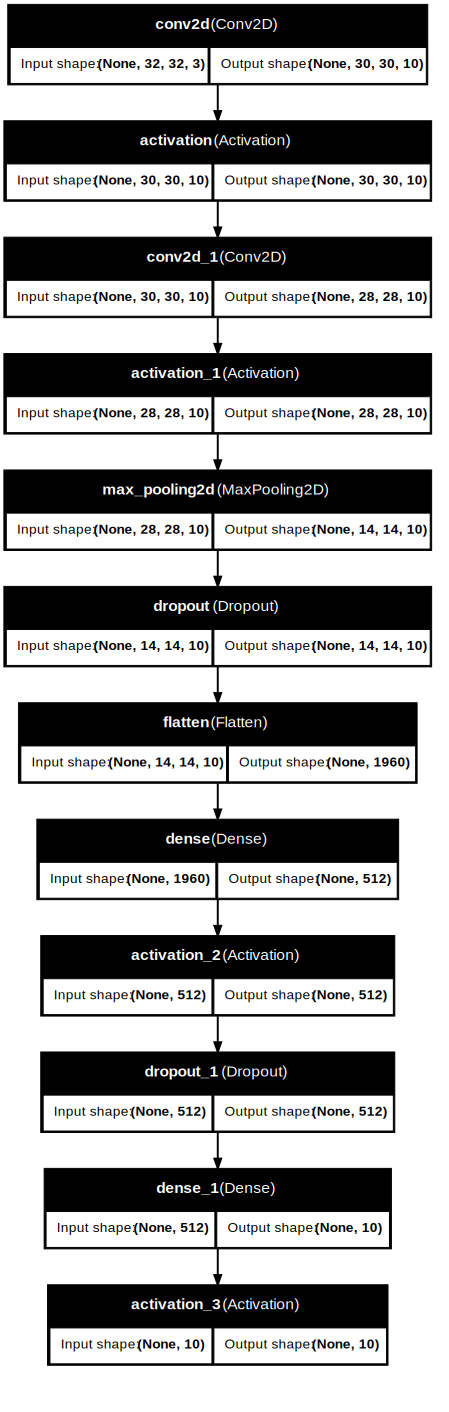

In [5]:
SVG(model_to_dot(model, show_shapes = True,
                 show_layer_names = True,
                 dpi = 70).create(prog = 'dot', format = 'svg'))

##Model architecture summary

In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,004,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010,352 (3.85 MB)

 Trainable params: 1,010,352 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
# Train model
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs = nb_epoch,
          batch_size = batch_size,
          verbose = 1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.2896 - loss: 1.9284 - val_accuracy: 0.4807 - val_loss: 1.4442
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4743 - loss: 1.4619 - val_accuracy: 0.5480 - val_loss: 1.2725
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5319 - loss: 1.3083 - val_accuracy: 0.5759 - val_loss: 1.1899
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5628 - loss: 1.2226 - val_accuracy: 0.5877 - val_loss: 1.1609
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5866 - loss: 1.1548 - val_accuracy: 0.6126 - val_loss: 1.1015


## Visualization of layers

In [10]:
# Visualization
def draw_image(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data)

def draw_feature_map(data, row, col):
    for j in range(row):
        plt.figure(figsize = (16, 16))
        for i in range(col):
            plt.subplot(row, col, i + 1)
            plt.imshow(data[j,:,:,i])
            plt.axis('off')
        plt.tight_layout()
    plt.show()

## Input layer (original image)

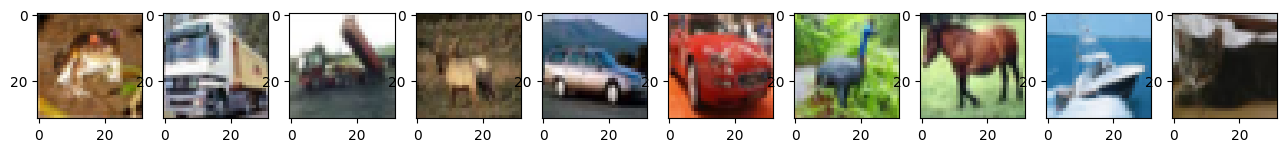

In [11]:
nb_images = 10
plt.figure(figsize = (16, 16))
for i in range(nb_images):
    draw_image(X_train[i], 1, nb_images, i + 1)
plt.show()

## First layer with 10 filters

First layer shape: (10, 30, 30, 10)


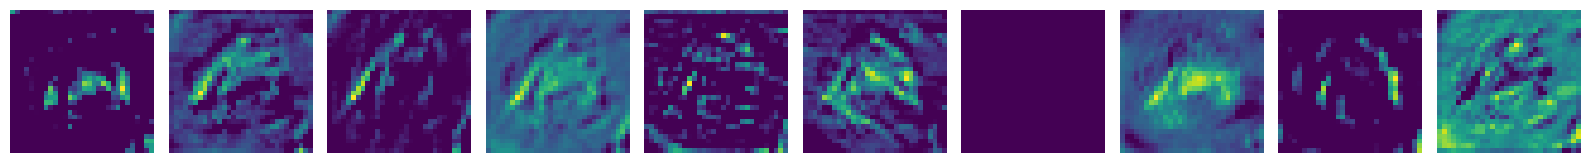

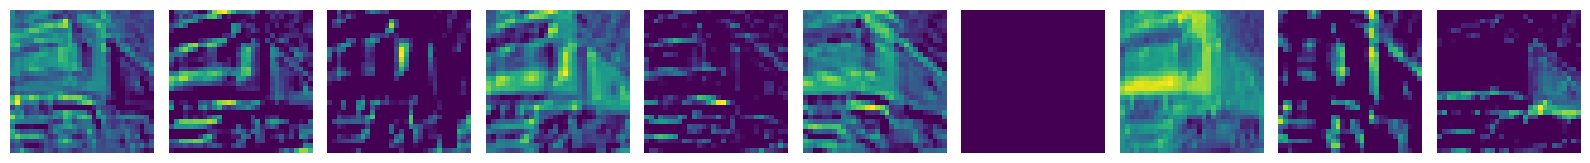

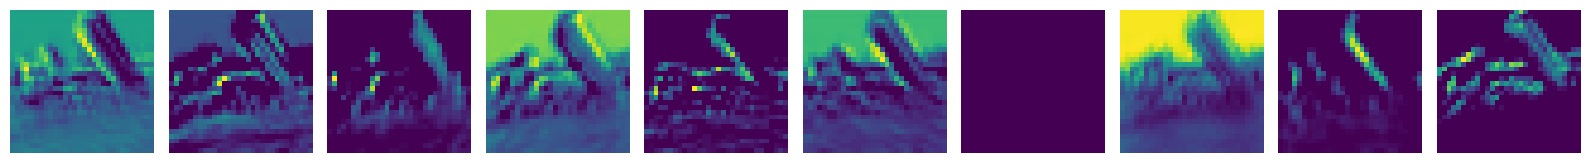

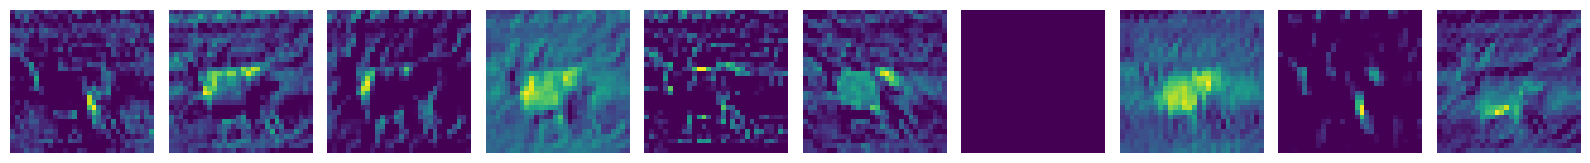

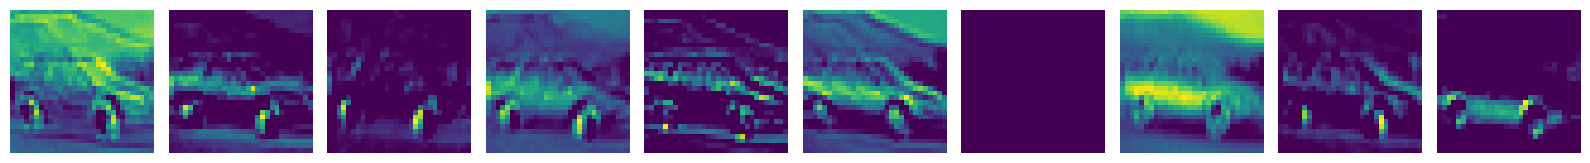

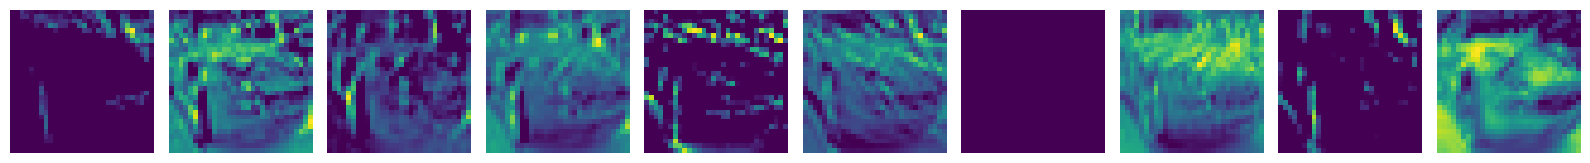

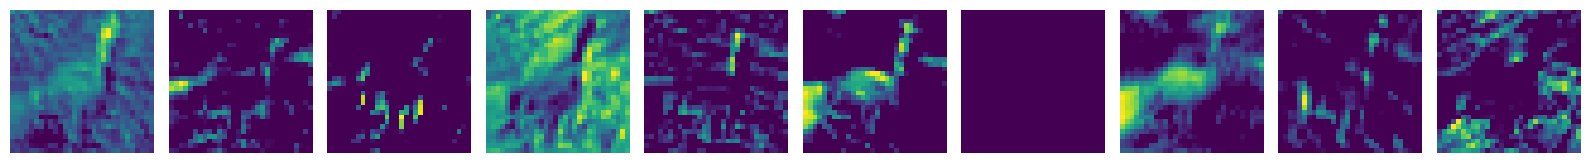

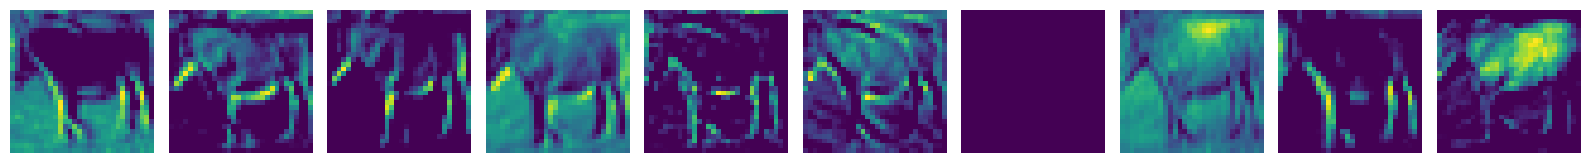

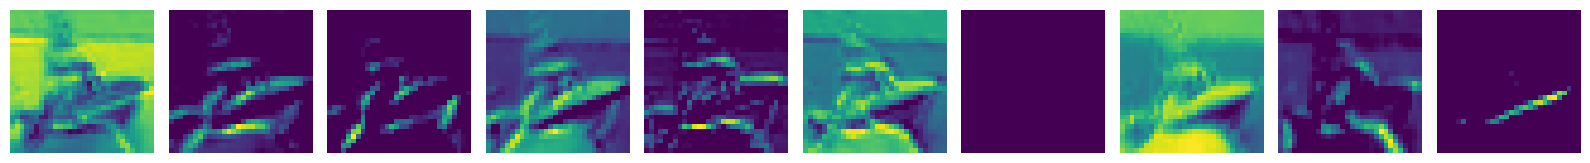

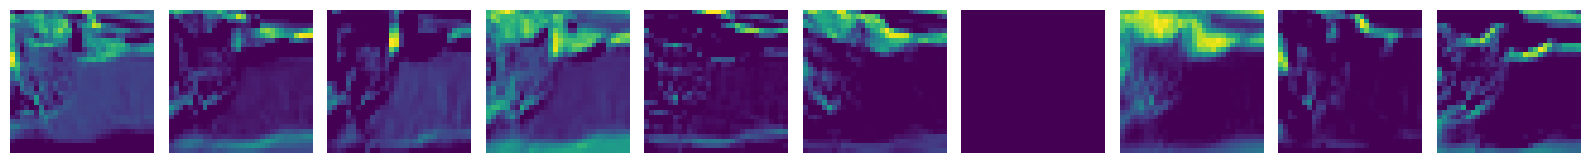

In [12]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
first_layers = activation_model(X_train[0:nb_images])

print ('First layer shape:', first_layers.shape)
draw_feature_map(first_layers, nb_images, nb_filters)

## Second layer with 10 filters

Second layer shape: (10, 28, 28, 10)


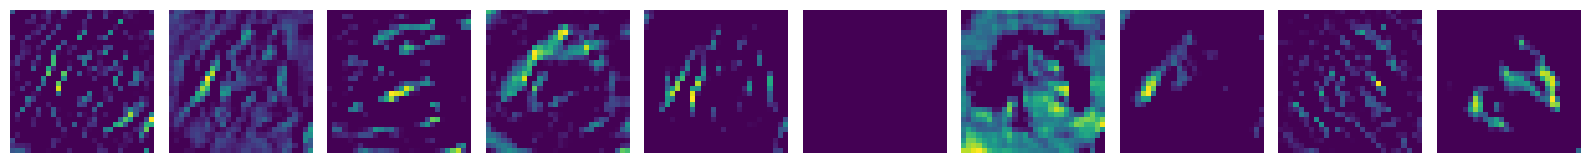

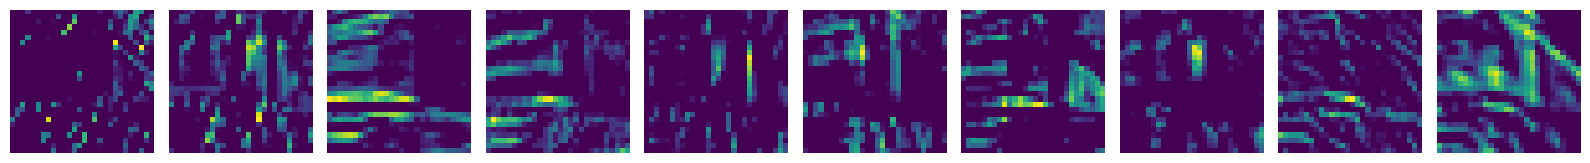

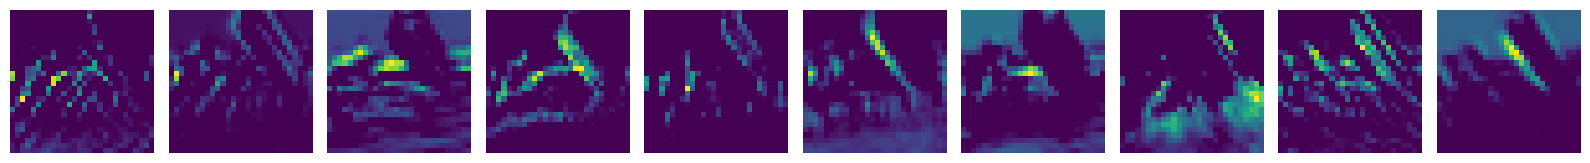

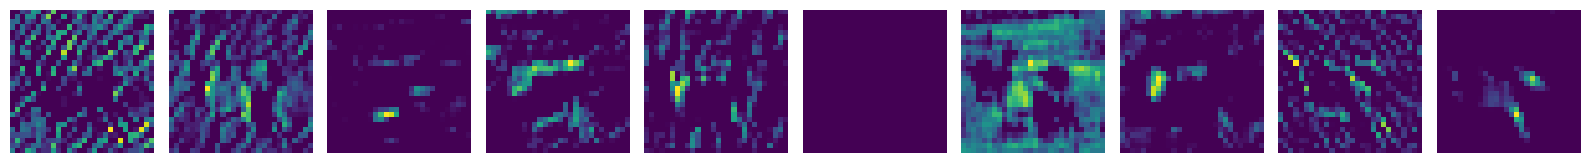

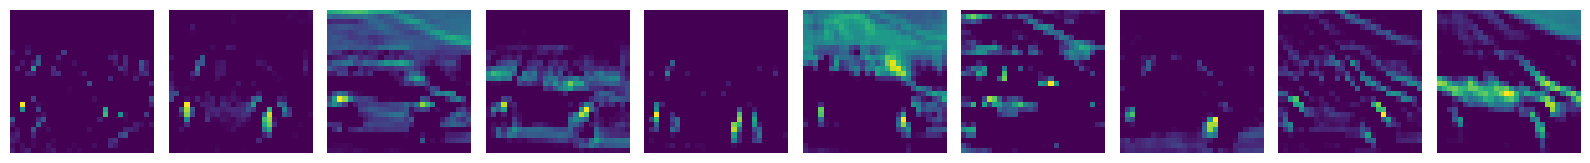

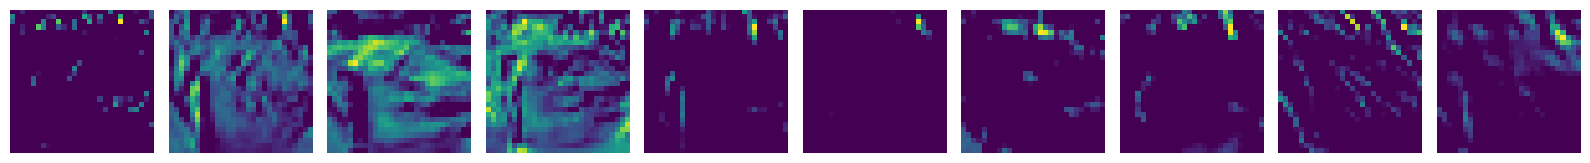

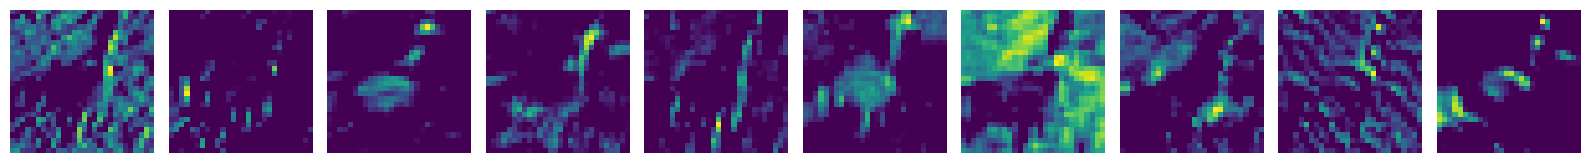

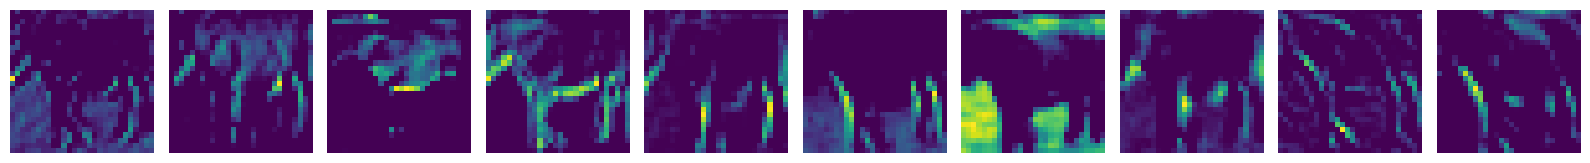

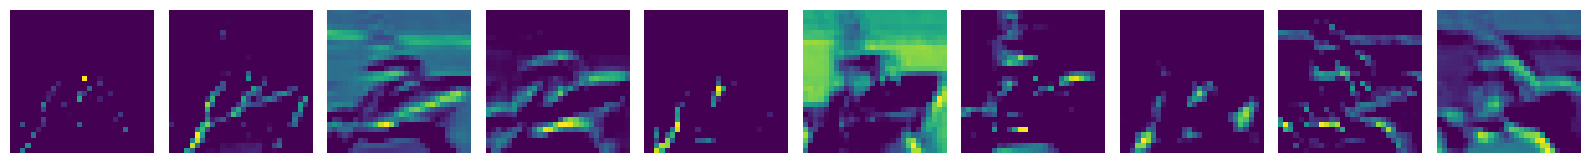

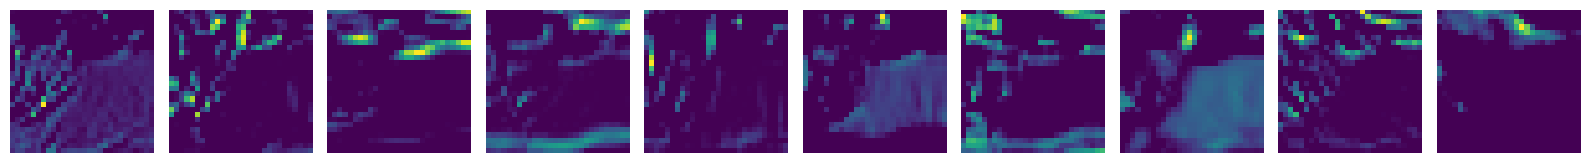

In [13]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[3].output)
second_layers = activation_model(X_train[0:nb_images])

print ('Second layer shape:', second_layers.shape)
draw_feature_map(second_layers, nb_images, nb_filters)

## Third layer with 10 filters

Third layer shape: (10, 14, 14, 10)


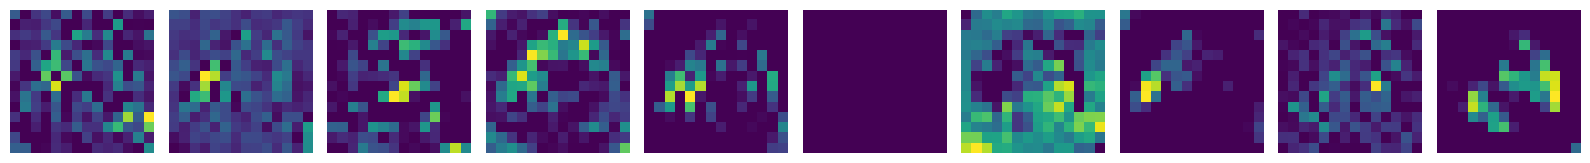

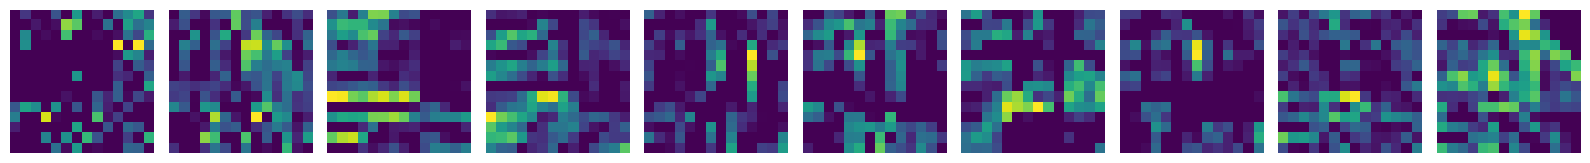

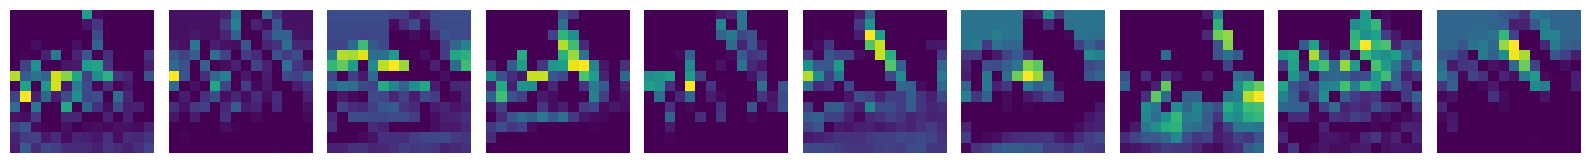

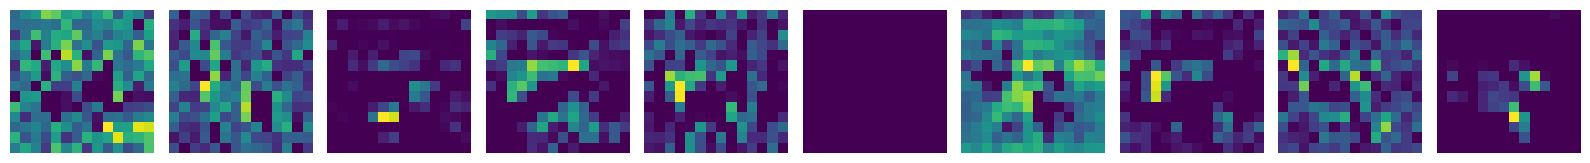

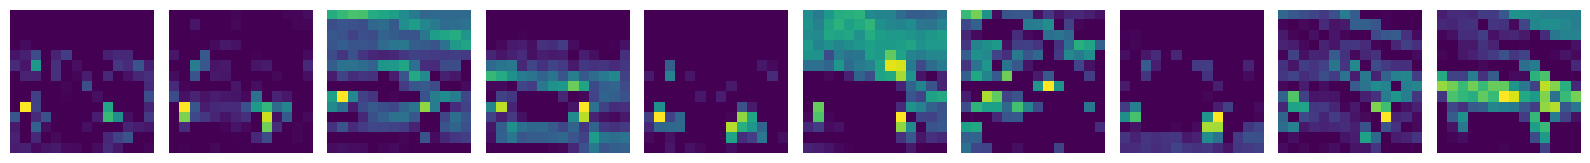

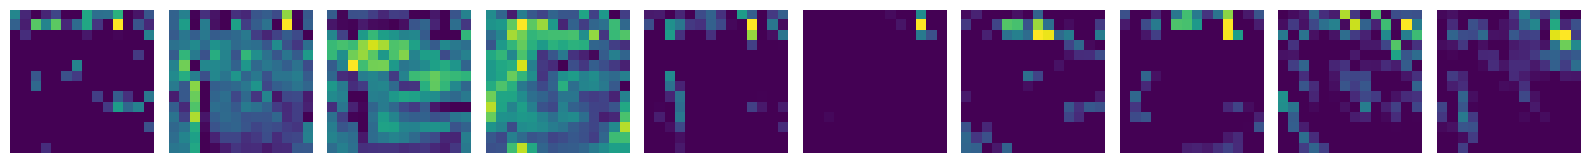

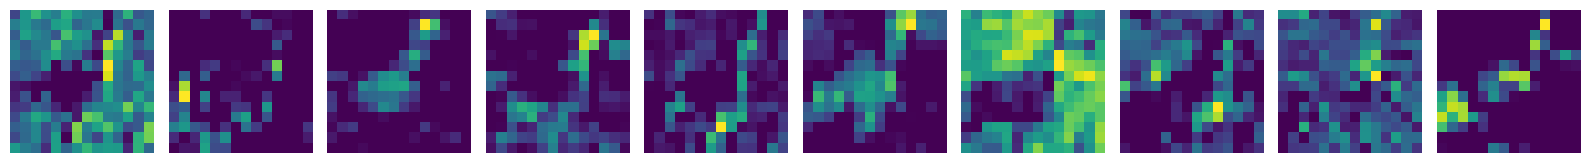

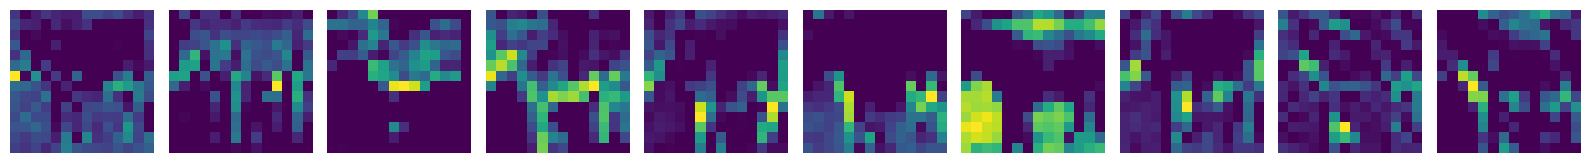

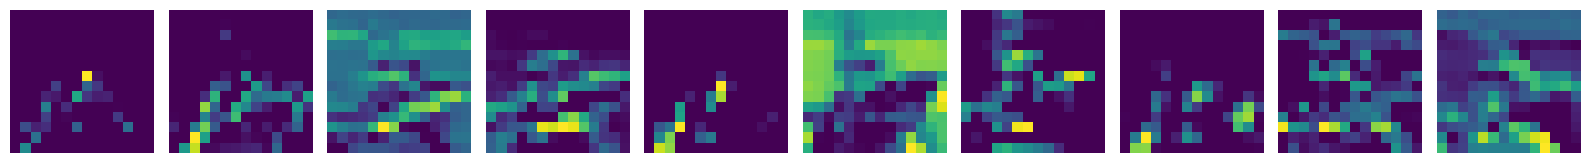

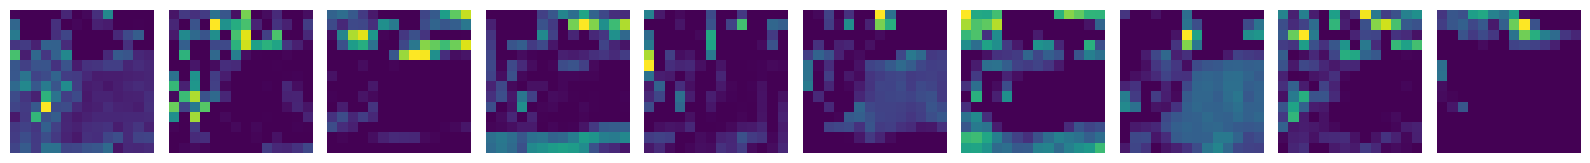

In [14]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[4].output)
third_layers = activation_model(X_train[0:nb_images])

print ('Third layer shape:', third_layers.shape)
draw_feature_map(third_layers, nb_images, nb_filters)

**Questions:**
1. Describe the structure of the model drawn using the **SVG()** function. Explain the meaning of each of these layers and the shape of its input and output data.
2. What is your understanding of *Trainable params* in the model architecture displayed using the **model.summary()** function?
3. Look at the image representations (feature maps) displayed in the output of the first and second layers and answer the question, what is the difference between them?
4. Look at the image representations (feature maps) displayed in the output of the second and third layers and answer the question, what is the difference between them?
5. What conclusions can you draw by observing the image representations (feature maps) at the outputs of layers that are deeper and deeper relative to the model input?
6. How do you think the accuracy of training and validation could be improved? Perform suitable experiments and describe the results obtained.

**Answers:**

## Exercise 2: The MNIST dataset
The **MNIST** dataset (*Modified National Institute of Standards and Technology database*) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.preprocessing import sequence
from IPython.display import SVG, display
from keras.utils import model_to_dot, plot_model

In [16]:
img_rows, img_cols = 28, 28
nb_classes = 10
nb_filters = 5    # The number of filters
nb_pool = 2       # Window size of pooling
nb_conv = 3       # Window or kernel size of filter
nb_epoch = 5
kernel_size = 3   # Convolution kernel size
input_shape = (img_rows, img_cols, 1) # Input_shape for Tensorflow

# Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
# Define 2 groups of layers: feature (convolutions) and classification (dense)
feature_layers = [Conv2D(nb_filters, kernel_size, input_shape = input_shape),
                  Activation('relu'),
                  Conv2D(nb_filters, kernel_size),
                  Activation('relu'),
                  MaxPooling2D(pool_size = nb_pool),
                  Dropout(0.25),
                  Flatten()]

classification_layers = [Dense(128),
                         Activation('relu'),
                         Dropout(0.5),
                         Dense(nb_classes),
                         Activation('softmax')]

In [18]:
# Create and compile model
model = Sequential(feature_layers + classification_layers)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

##Model layers visualization

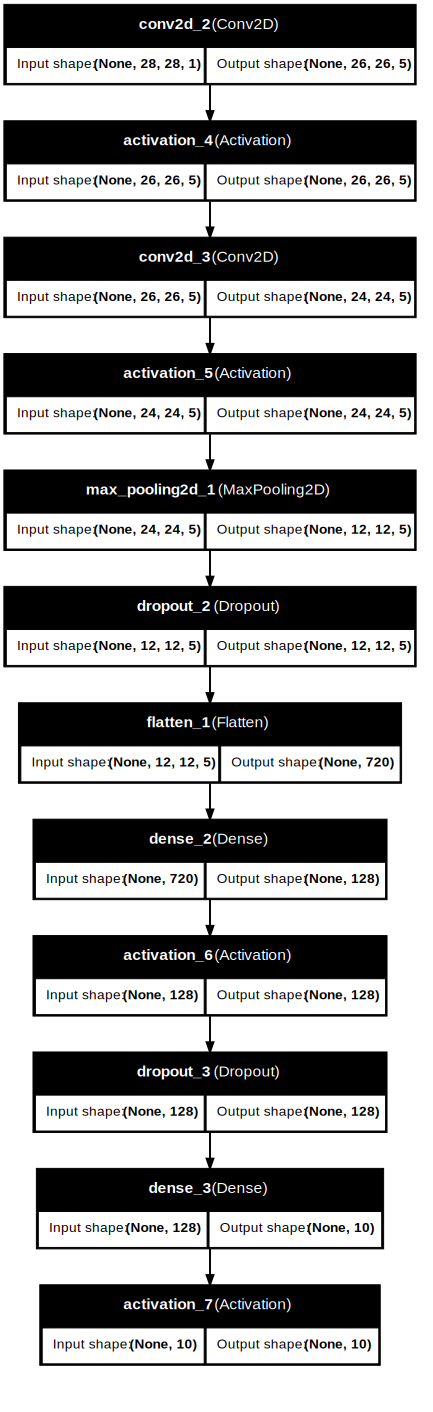

In [19]:
SVG(model_to_dot(model, show_shapes = True,
                 show_layer_names = True,
                 dpi = 70).create(prog = 'dot', format = 'svg'))

##Model architecture summary

In [20]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 5)           │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 720)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          92,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,858 (366.63 KB)

 Trainable params: 93,858 (366.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Train model
model.fit(X_train, Y_train,
          batch_size = 256,
          epochs = nb_epoch,
          verbose = 1,
          validation_split = 0.2)

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5881 - loss: 1.3594 - val_accuracy: 0.9397 - val_loss: 0.2143
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9065 - loss: 0.3031 - val_accuracy: 0.9643 - val_loss: 0.1266
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9368 - loss: 0.2076 - val_accuracy: 0.9728 - val_loss: 0.1003
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9496 - loss: 0.1613 - val_accuracy: 0.9773 - val_loss: 0.0853
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9560 - loss: 0.1420 - val_accuracy: 0.9797 - val_loss: 0.0767


## Visualization of layers

In [22]:
# Visualization
def draw_image(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data)

def draw_feature_map(data, row, col):
    for j in range(row):
        plt.figure(figsize = (16, 16))
        for i in range(col):
            plt.subplot(row, col, i + 1)
            plt.imshow(data[j,:,:,i])
            plt.axis('off')
        plt.tight_layout()
    plt.show()

## Input layer (original image)

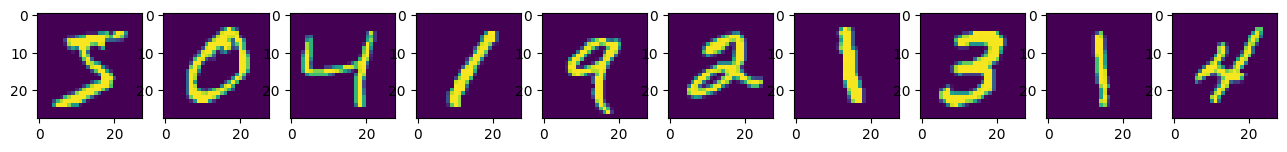

In [23]:
nb_images = 10
plt.figure(figsize = (16, 16))

for i in range(nb_images):
    draw_image(X_train[i].reshape(28, 28), 1, nb_images, i + 1)
plt.show()

## First layer with 5 filters

First layer shape: (10, 26, 26, 5)


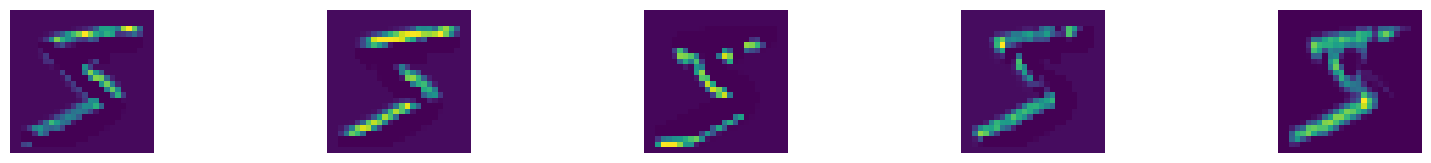

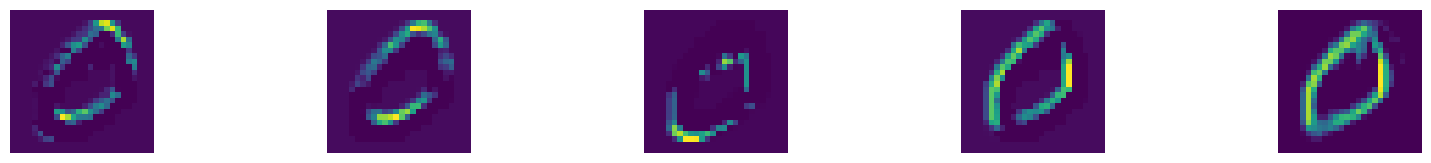

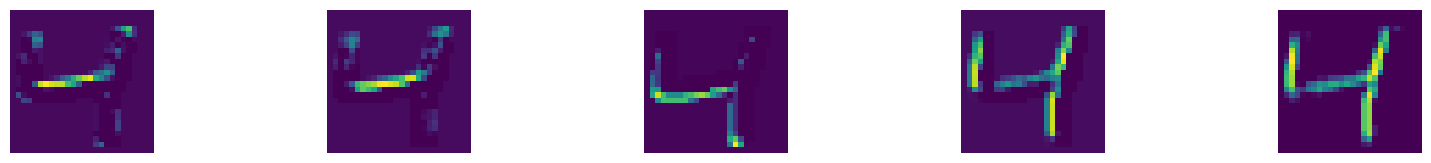

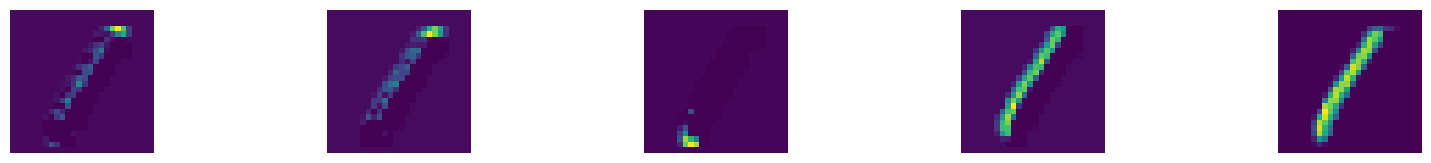

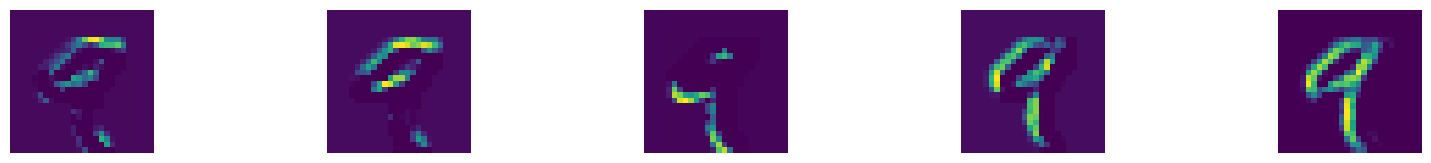

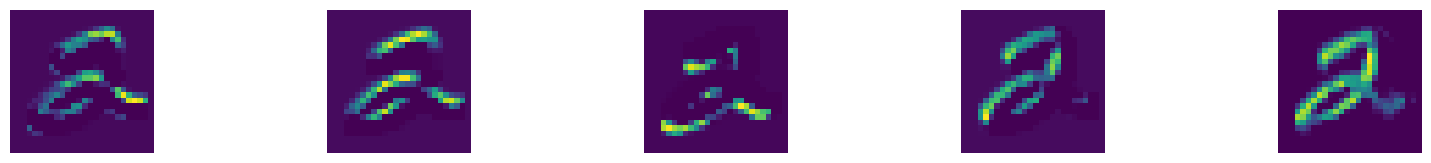

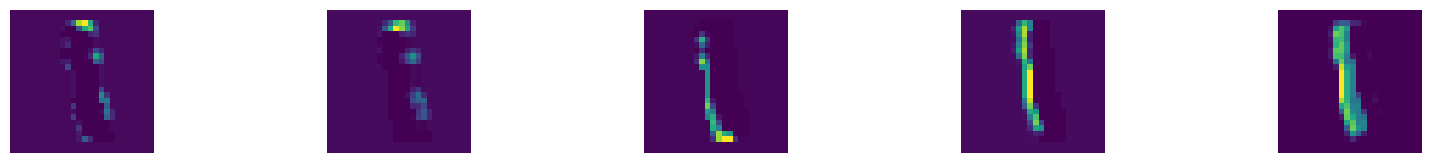

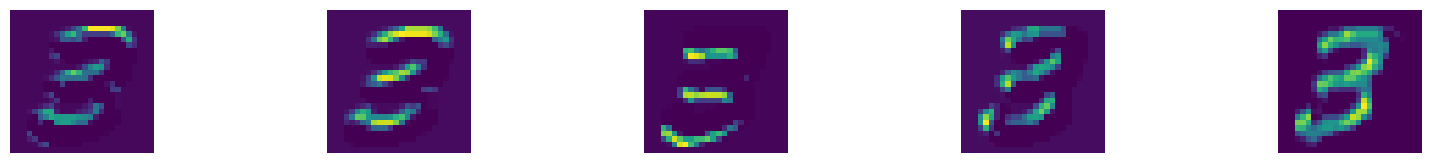

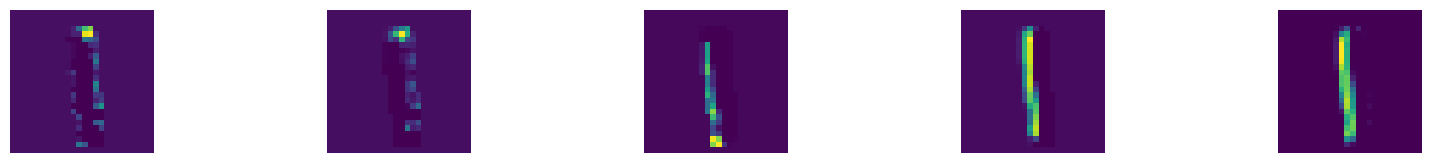

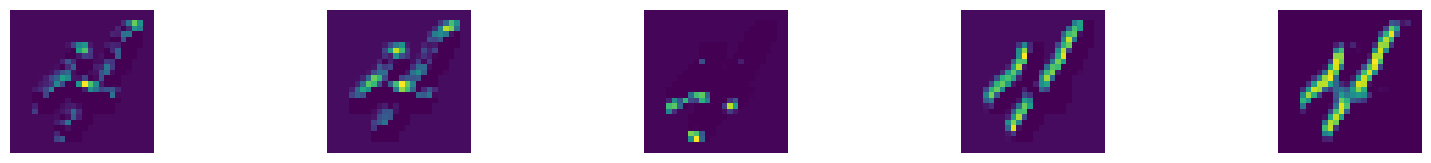

In [24]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
first_layers = activation_model(X_train[0:nb_images])

print ('First layer shape:', first_layers.shape)
draw_feature_map(first_layers, nb_images, nb_filters)

## Second layer with 5 filters

Second layer shape: (10, 24, 24, 5)


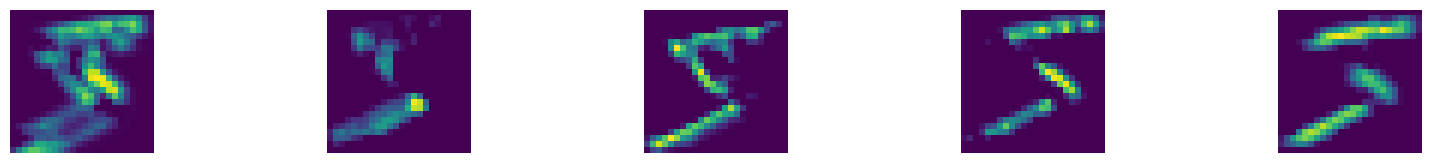

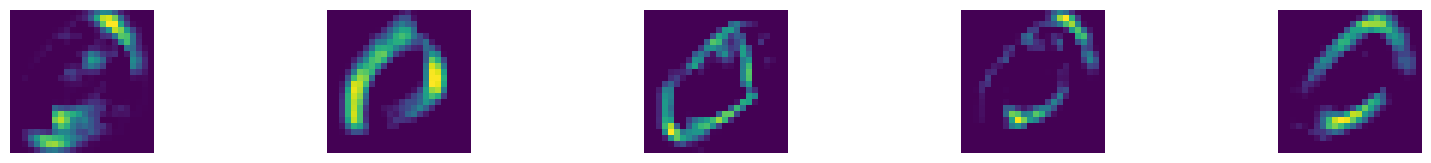

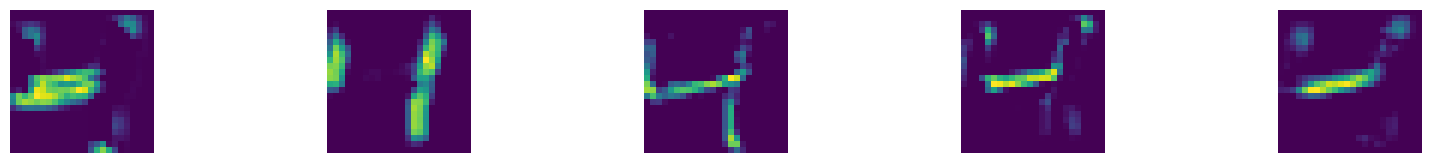

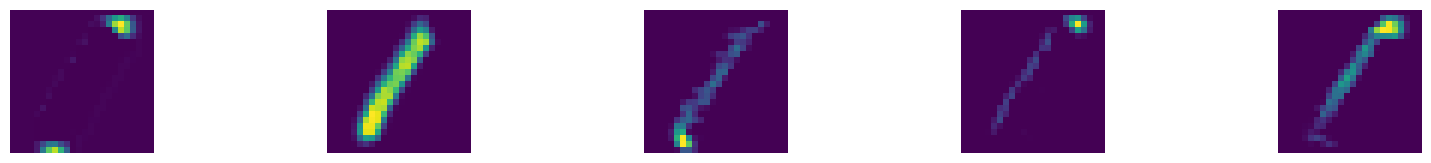

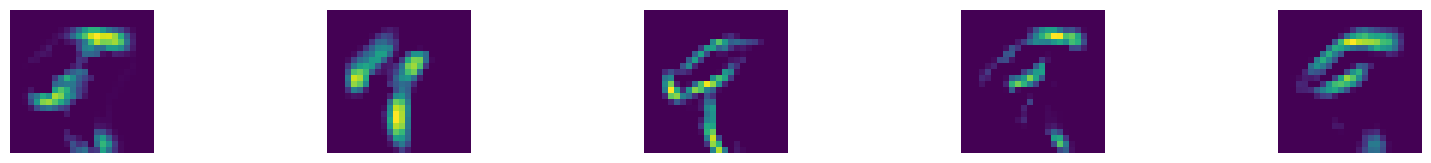

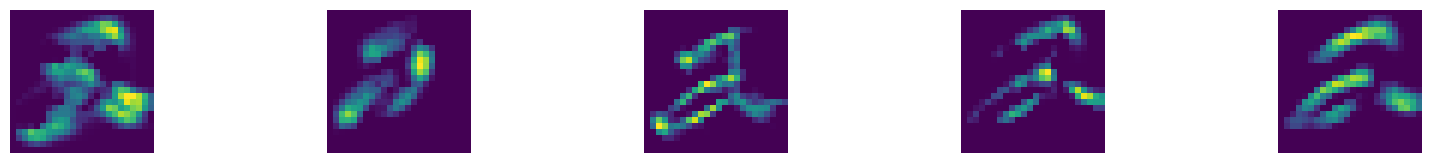

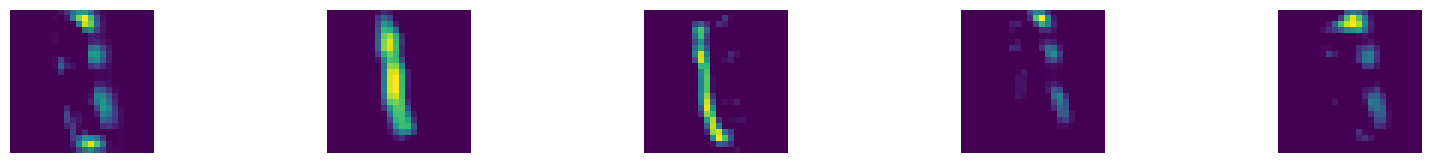

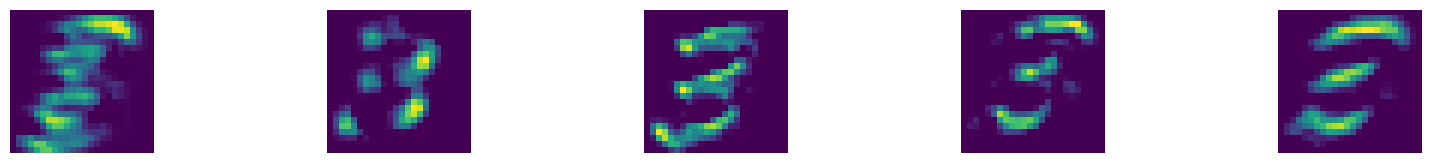

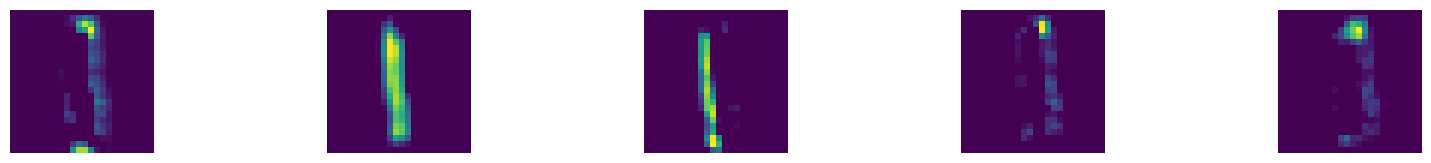

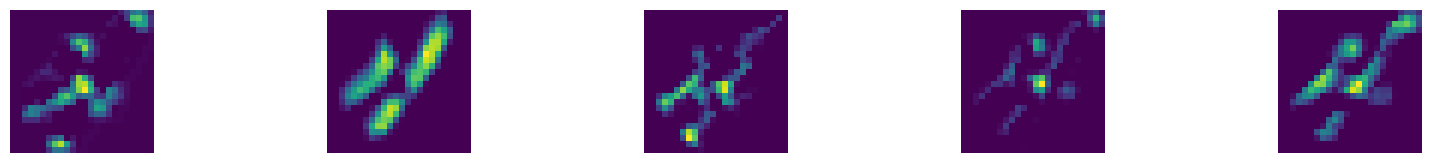

In [25]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[3].output)
second_layers = activation_model(X_train[0:nb_images])

print ('Second layer shape:', second_layers.shape)
draw_feature_map(second_layers, nb_images, nb_filters)

## Third layer with 5 filters

Third layer shape: (10, 12, 12, 5)


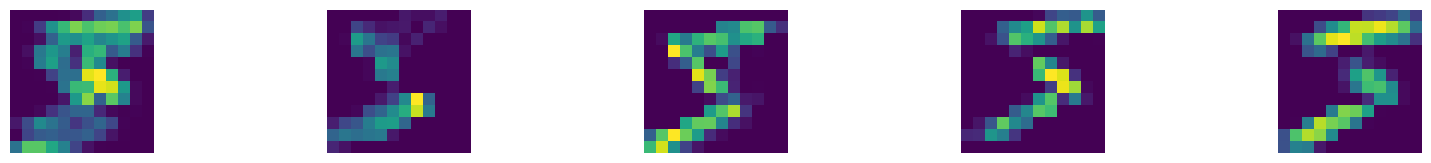

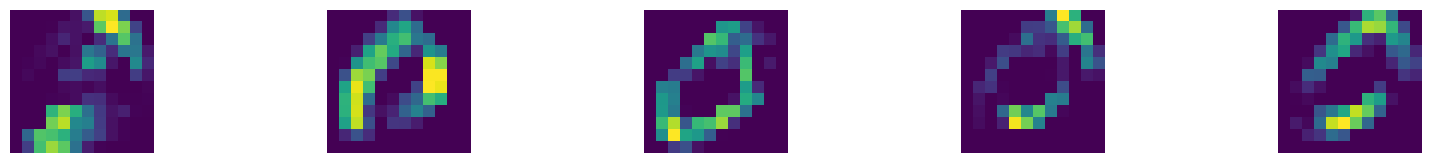

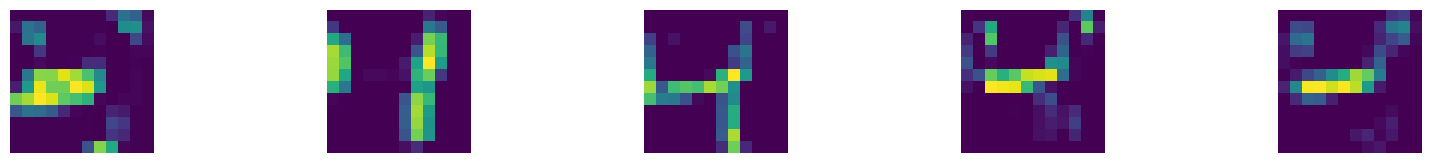

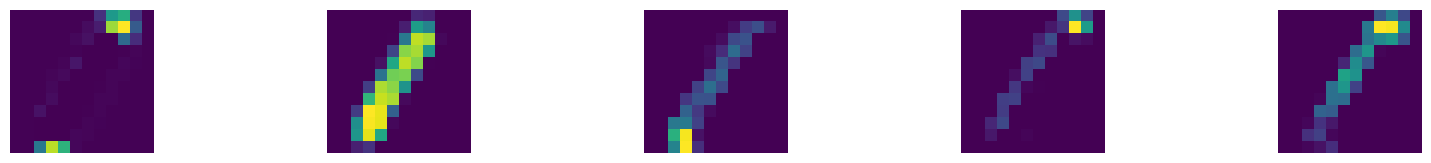

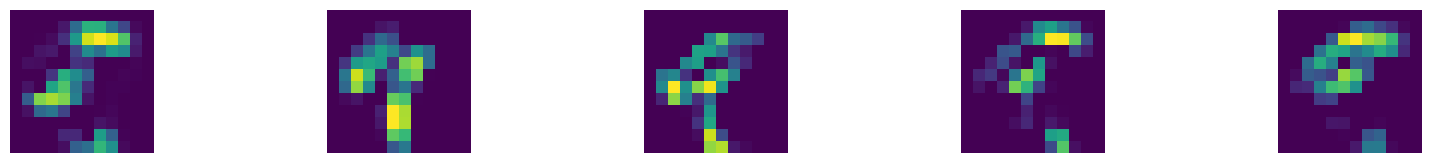

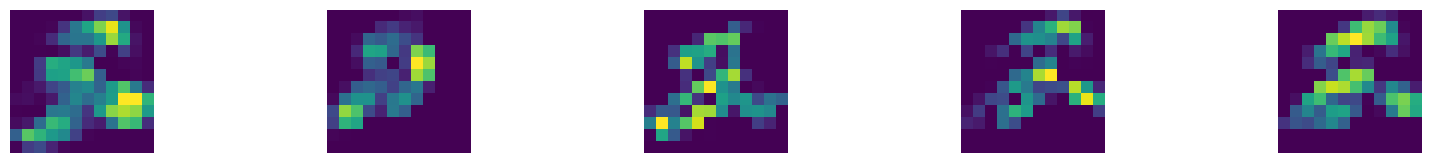

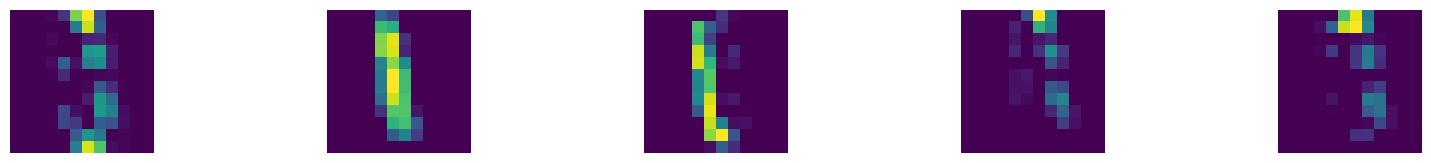

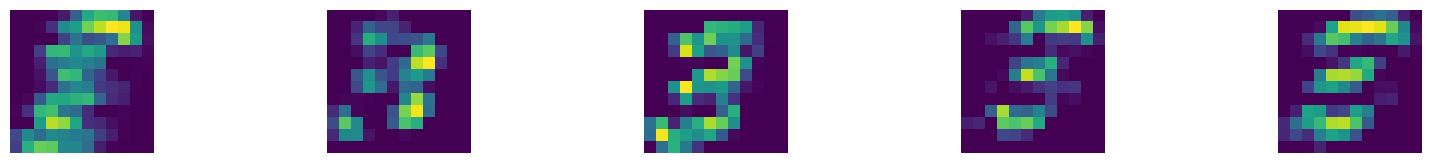

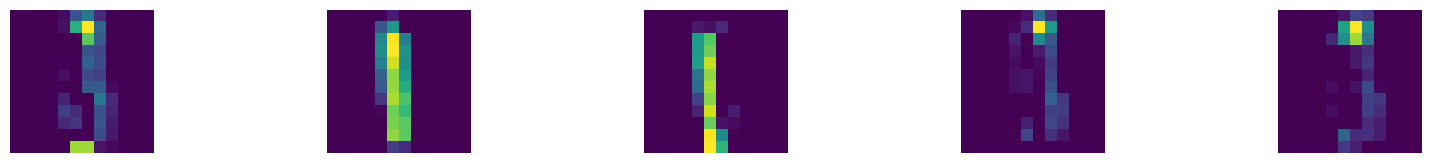

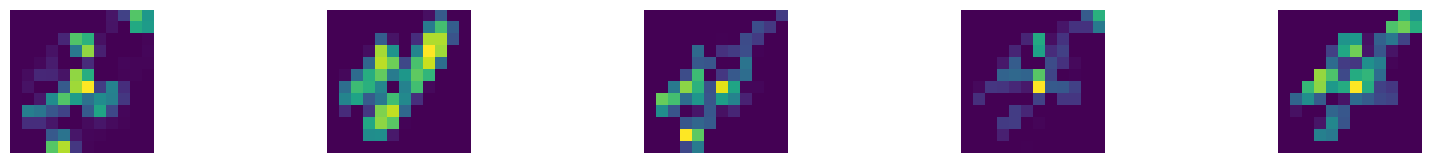

In [26]:
activation_model = Model(inputs=model.inputs, outputs=model.layers[4].output)
third_layers = activation_model(X_train[0:nb_images])

print ('Third layer shape:', third_layers.shape)
draw_feature_map(third_layers, nb_images, nb_filters)

**Questions:**
1. Describe the structure of the model drawn using the **SVG()** function. Explain the function of each of these layers and the shape of its input and output data.
2. Why is a difference between the number of *Trainable params* in exercise 1 and 2?
3. What is the difference between the input images in exercises number 1 and 2?
4. What is the difference between the model training time in exercise number 1 and 2? What does it result from?
5. What conclusions can you draw by observing the image representations (feature maps) at the outputs of layers that are deeper and deeper relative to the model input?
6. Why the higher training and validation accuracy was achieved in exercise 2?

**Answers:**